# **II. ANALYSE DE L'AMONT DES SUA**

## **II. 1) Analyse statistique des bases de données réelles des SUA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
chemin = 'BD_2016_2020_TableauDynamique.xlsx'
df = pd.read_excel(chemin, sheet_name="Extraction juin 2016 juin 2020")

In [4]:
df.head()

,Num d'ordre,Date,Heure,Informations du passage->date et heure d'arrivée,Informations du passage->moyen d'arrivée,IAO->motif d'entrée,IAO->motif de venue,Patient->age en année,Antécédent->antécédents médicaux,Antécédent->antécédents chirurgicaux,...,Informations du passage->CAC du séjour,Informations du passage->date et heure de sortie,Informations du passage->date début prise en charge médicale,Informations du passage->dossier dans l'hôpital,Orientation->type d'orientation,Orientation->destination,Orientation->tansfert vers le service,Orientation->transfert vers l'hôpital,Patient->code postal de la ville,Patient->nom de la ville
0,1,2016-06-01,00:16:00,2016-06-01 00:16:00,AMBULANCE PRIVEE,"Malaise, difficulté respi, palpitation, Pas de...",Cardiologie: Palpitations Malaise,33,NaN,NaN,...,3093.0,42522.176389,42522.043750,NaN,RETOUR DOMICILE,RETOUR DOMICILE,NaN,NaN,59139,WATTIGNIES
1,2,2016-06-01,00:18:00,2016-06-01 00:18:00,AMBULANCE PRIVEE,"AEG, Hyperthermie et difficulté respi en maiso...",Maladies infectieuses: Hyperthermie,78,NaN,NaN,...,3102.0,42522.461806,42522.093056,NaN,TRANSFERT EXTERNE,Transfert CLINIQUE DUBOIS (LILLE) Motif: Conve...,NaN,CLINIQUE DUBOIS,59310,ORCHIES
2,3,2016-06-01,00:36:00,2016-06-01 00:36:00,POMPIERS,NaN,NaN,77,NaN,NaN,...,3102.0,42522.127778,NaN,NaN,TRANSFERT INTERNE,Admis(e) en NEUROLOGIE B 5 EST (3281/CAC),NEUROLOGIE B 5 EST,NaN,59480,LA BASSEE
3,4,2016-06-01,00:43:00,2016-06-01 00:43:00,MOYENS PERSONNELS,"1A, Hyperthermie ne cédant pas au paracetamol,...",Maladies infectieuses: Hyperthermie,38,NaN,NaN,...,3093.0,42522.201389,42522.081250,NaN,RETOUR DOMICILE,RETOUR DOMICILE,NaN,NaN,59136,WAVRIN
4,5,2016-06-01,01:16:00,2016-06-01 01:16:00,AMBULANCE PRIVEE,"Douleur bras gauche et mollet gauche, hémiplég...",Cardiologie: Phlébite,69,décembre 2007 : infarctus capsulo caudé droit ...,NaN,...,3102.0,42522.663194,42522.107639,NaN,RETOUR DOMICILE,RETOUR DOMICILE,NaN,NaN,59130,LAMBERSART


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336253 entries, 0 to 336252
Data columns (total 41 columns):
 #   Column                                                                        Non-Null Count   Dtype         
---  ------                                                                        --------------   -----         
 0   Num d'ordre                                                                   336253 non-null  int64         
 1   Date                                                                          336253 non-null  datetime64[ns]
 2   Heure                                                                         336253 non-null  object        
 3    Informations du passage->date et heure d'arrivée                             336253 non-null  datetime64[ns]
 4    Informations du passage->moyen d'arrivée                                     334907 non-null  object        
 5    IAO->motif d'entrée                                                          3

In [5]:
df.isna().sum()

Num d'ordre                                                                          0
Date                                                                                 0
Heure                                                                                0
 Informations du passage->date et heure d'arrivée                                    0
 Informations du passage->moyen d'arrivée                                         1346
 IAO->motif d'entrée                                                             24451
 IAO->motif de venue                                                             28719
 Patient->age en année                                                               0
 Antécédent->antécédents médicaux                                               233630
 Antécédent->antécédents chirurgicaux                                           265119
 Constante->Surveillances->PAS/PAD adultes (première valeur)                     93635
 Constante->Surveillances->FC adultes (prem

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# remarques :

# 1) bcp de données non-numériques
# --> variables quali : encoder ça ?
# --> variables quanti :
  #  motif entrée,
  #  motif venue,
  #  antécédents médicaux,
  #  antécédents chirurgicaux,
  #  Orientation->destination
  #  Orientation->tansfert vers le service
  #  Orientation->transfert vers l'hôpital
  #  nom de la ville

# 2) renommer variables prcq là c'est le bordèle

# 3) pas de duplicats donc lourd

# 4) par contre, bcp de na !!

# 5) variable cible ? j'aurais mis le temps pass aux urgences donc date/heure d'arrivée - date/heure de sortie mais à voir

# 6) sélectionner variables indicateurs : en fonction du niveau de corrélation avec notre var cible ? avec bon sens ? ACP ?


<Axes: >

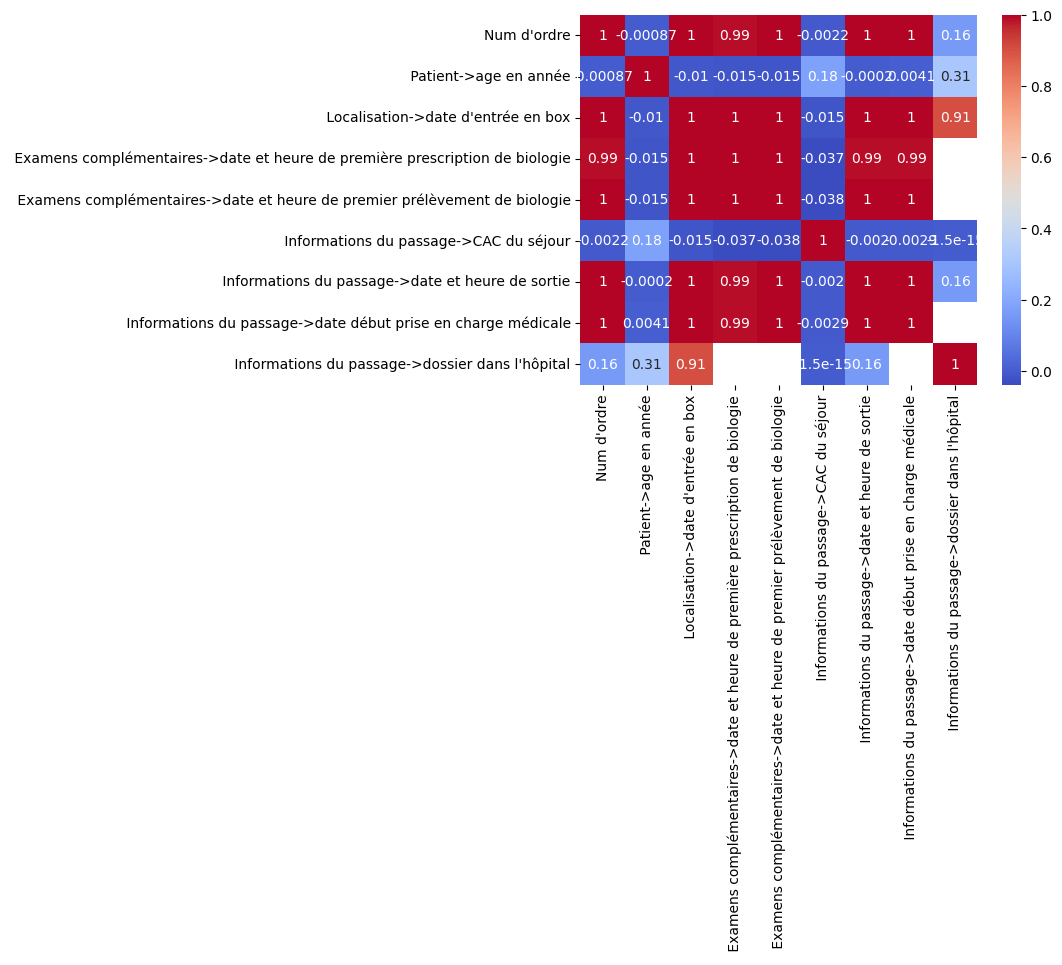

In [8]:
# matrice de corrélation
sns.heatmap(df.select_dtypes(include=[float, int]).corr(method='pearson'), cmap='coolwarm', annot=True)


### Indicateur 1

In [5]:
# Les courbes
ma partie

SyntaxError: invalid syntax (1770148742.py, line 2)

In [ ]:
# Analyse

In [ ]:
# Intérêt de l’étude

### Indicateur 2

In [ ]:
# Les courbes

In [ ]:
# Analyse

In [ ]:
# Intérêt de l'étude

### Indicateur 3

In [ ]:
# Les courbes

In [ ]:
# Analyse

In [ ]:
# Intérêt de l'étude